<a href="https://colab.research.google.com/github/Prathamesh-Chavan-98/Defogging_pro/blob/main/Defogging_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

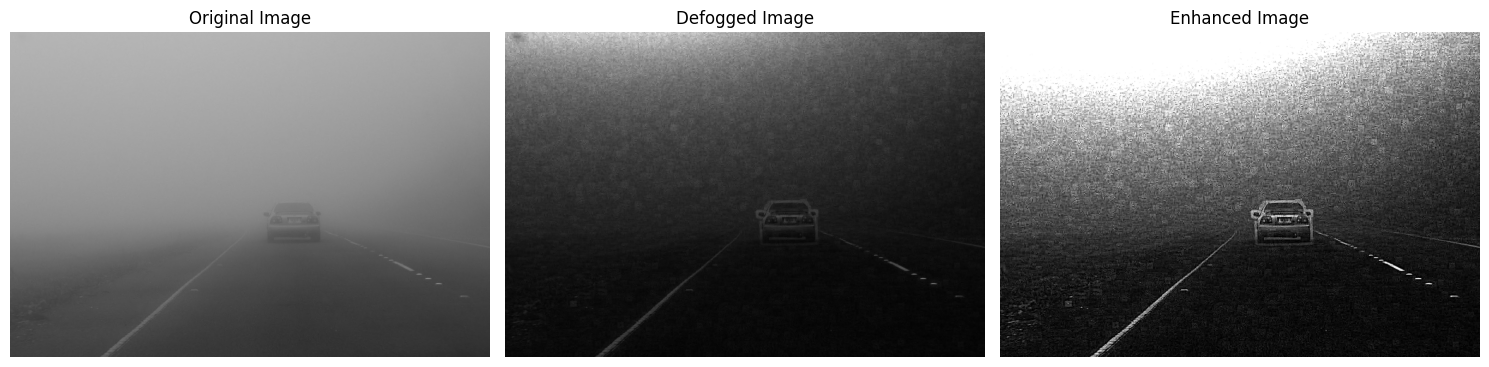

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Dark Channel Prior (DCP) defogging with adjusted atmospheric light
def apply_dcp(image, window_size=15, omega=0.95, epsilon=0.001):
    min_channel = cv2.erode(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), np.ones((window_size, window_size), np.uint8))
    atmospheric_light = np.percentile(image.reshape(-1, 3), 99, axis=0)  # Adjusted atmospheric light estimation
    transmission = 1 - omega * min_channel / atmospheric_light.max()
    scene_radiance = np.zeros_like(image, dtype=np.float64)
    for i in range(3):
        scene_radiance[:, :, i] = ((image[:, :, i].astype(np.float64) - atmospheric_light[i]) / np.maximum(transmission, epsilon)) + atmospheric_light[i]
    scene_radiance = np.uint8(np.clip(scene_radiance, 0, 255))
    return scene_radiance

# Enhancer for color correction and sharpening
def enhance_image(image, gamma=1.2, sharpening_strength=1.5):
    # Color correction (gamma correction)
    enhanced_image = np.clip(image ** gamma, 0, 255).astype(np.uint8)
    # Sharpening
    blurred = cv2.GaussianBlur(enhanced_image, (0, 0), 2.5)
    enhanced_image = cv2.addWeighted(enhanced_image, 1.0 + sharpening_strength, blurred, -sharpening_strength, 0)
    return enhanced_image

# Load the image
img = cv2.imread('/content/foggy-046.jpg')

# Apply Dark Channel Prior (DCP) for defogging with adjusted atmospheric light
defogged_image = apply_dcp(img)

# Enhance the defogged image
enhanced_image = enhance_image(defogged_image)

# Display the original, defogged, and enhanced images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(defogged_image, cv2.COLOR_BGR2RGB))
plt.title('Defogged Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))
plt.title('Enhanced Image')
plt.axis('off')

plt.tight_layout()
plt.show()
